In [1]:
import pandas as pd 

In [2]:
data=pd.read_csv('gpt_dataset.csv')
data

,Category,Resume
0,Frontend Developer,"As a seasoned Frontend Developer, I have a pro..."
1,Backend Developer,With a solid background in Backend Development...
2,Python Developer,"As a Python Developer, I leverage my expertise..."
3,Data Scientist,"With a background in Data Science, I possess a..."
4,Frontend Developer,Experienced Frontend Developer with a passion ...
...,...,...
395,Cloud Engineer,Dynamic Cloud Engineer specializing in archite...
396,Cloud Engineer,Skilled Cloud Engineer with a focus on buildin...
397,Full Stack Developer,Experienced Full Stack Developer with expertis...
398,Full Stack Developer,Innovative Full Stack Developer with a passion...


In [3]:
data.isnull().sum()

Category    0
Resume      0
dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [7]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['Resume'])
Y = data['Category']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [10]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [11]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.99
                                    precision    recall  f1-score   support

                 Backend Developer       0.93      1.00      0.97        14
                    Cloud Engineer       1.00      1.00      1.00        19
                    Data Scientist       1.00      1.00      1.00        16
                Frontend Developer       1.00      1.00      1.00        13
              Full Stack Developer       1.00      1.00      1.00         8
         Machine Learning Engineer       1.00      1.00      1.00        10
Mobile App Developer (iOS/Android)       1.00      1.00      1.00        13
                  Python Developer       1.00      0.86      0.92         7

                          accuracy                           0.99       100
                         macro avg       0.99      0.98      0.99       100
                      weighted avg       0.99      0.99      0.99       100



In [16]:
resume_input = ["Data"]
input_vec = vectorizer.transform(resume_input)
prediction = model.predict(input_vec)

print("Predicted Category:", prediction[0])


Predicted Category: Data Scientist


In [18]:
import joblib
joblib.dump(model, 'resume_classifier.joblib')

['resume_classifier.joblib']

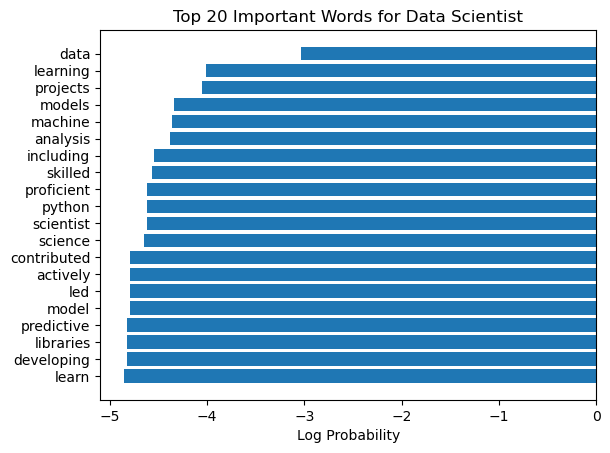

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Get the index of 'Data Scientist' class
category_index = list(model.classes_).index('Data Scientist')

# Get the top 20 features (words) for that class
top20 = np.argsort(model.feature_log_prob_[category_index])[-20:]

# Get the feature names and their log probabilities
words = np.array(vectorizer.get_feature_names_out())[top20]
weights = model.feature_log_prob_[category_index][top20]

# Plot
plt.barh(words, weights)
plt.title('Top 20 Important Words for Data Scientist')
plt.xlabel('Log Probability')
plt.show()
